- 평균차이분석 (분산분석)은 독립변수가 범주형, 종속변수가 연속형일때 사용하는 분석법

In [2]:
import pandas as pd

In [3]:
bank = pd.read_csv("bank.csv", sep= ";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


- 데이터 탐색

In [4]:
bank.groupby(bank["marital"])[["age"]].describe().T

marital      divorced      married       single
age count  528.000000  2797.000000  1196.000000
    mean    45.475379    43.454415    33.927258
    std     10.116183    10.309992     7.506353
    min     26.000000    23.000000    19.000000
    25%     37.000000    35.000000    29.000000
    50%     45.000000    42.000000    32.000000
    75%     53.000000    51.000000    37.000000
    max     84.000000    87.000000    69.000000

- 시각화

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:title={'center':'age'}, xlabel='marital'>

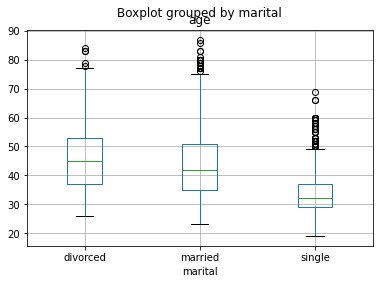

In [6]:
bank.boxplot(column = "age", by = "marital")

<AxesSubplot:xlabel='marital', ylabel='age'>

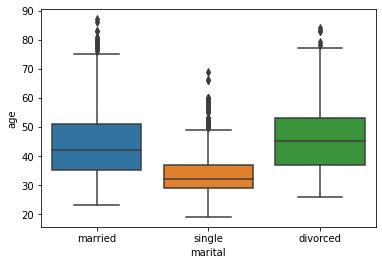

In [7]:
sns.boxplot(data = bank, x = "marital", y = "age")

- marital 범주에 따른 age 값 분류

In [8]:
divorced = bank[bank["marital"] == "divorced"].age.values
married = bank[bank["marital"] == "married"].age.values
single = bank[bank["marital"] == "single"].age.values

In [9]:
print(divorced)
print(married)
print(single)

[38 42 68 42 78 45 54 51 42 54 41 50 27 36 46 31 77 32 56 45 35 45 40 57
 39 48 55 42 56 51 42 53 49 45 70 65 47 51 48 53 35 75 49 42 55 37 35 43
 45 35 55 33 48 42 48 45 43 49 46 47 36 35 43 60 43 58 36 58 33 41 35 57
 46 50 58 36 55 41 32 35 35 52 43 57 37 37 51 37 49 38 53 53 45 40 55 48
 46 51 33 50 51 33 32 54 51 39 50 34 33 44 58 55 53 36 34 56 43 37 58 56
 52 55 39 47 41 53 28 50 26 45 50 36 38 43 41 35 52 60 36 41 38 27 54 53
 41 60 49 32 75 37 33 32 55 35 33 43 41 46 55 46 59 33 40 55 43 65 53 33
 51 48 49 49 57 36 75 51 56 57 53 44 51 47 42 57 54 50 31 28 45 42 60 47
 47 46 29 32 42 29 33 36 52 44 51 42 51 40 38 44 48 58 39 56 49 33 35 40
 39 44 59 54 48 34 39 35 49 59 44 44 40 42 41 46 50 55 56 37 58 74 54 42
 59 41 51 50 56 41 38 34 46 52 38 35 46 62 41 32 51 52 56 54 35 41 55 42
 42 42 32 49 47 47 57 34 47 36 51 54 38 37 56 33 35 32 42 54 41 33 49 42
 50 59 50 35 31 47 56 53 38 59 44 48 56 44 56 38 34 40 46 50 46 45 33 35
 45 31 56 47 56 48 45 55 64 45 44 47 46 54 35 35 53

- 평균차이분석

In [10]:
import scipy.stats as stats

In [11]:
stats.f_oneway(divorced, married, single) #statistic = F 값

F_onewayResult(statistic=470.30983916397145, pvalue=2.8405222686637417e-186)

- 사후검정

In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [25]:
# endog에 종속변수를 쓰고 groups에 종속변수를 쓴다.
tukey = pairwise_tukeyhsd(endog = bank["age"], groups = bank["marital"],
                         alpha = 0.05)

In [26]:
tukey.summary() #reject 가 true 면 유의

group1,group2,meandiff,p-adj,lower,upper,reject
divorced,married,-2.021,0.001,-3.0916,-0.9503,True
divorced,single,-11.5481,0.001,-12.7271,-10.3692,True
married,single,-9.5272,0.001,-10.3067,-8.7476,True


C:\Users\201710567\Anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


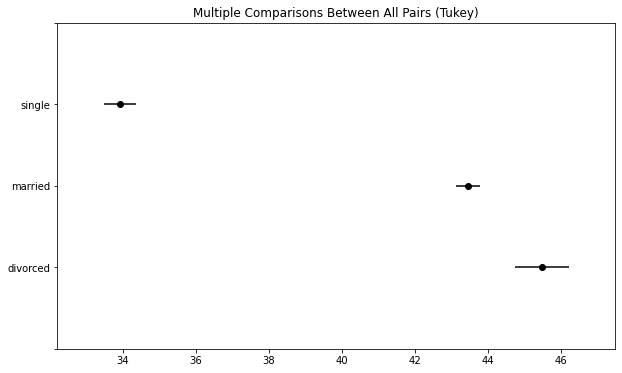

In [27]:
fig = tukey.plot_simultaneous()

- 시각화

C:\Users\201710567\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

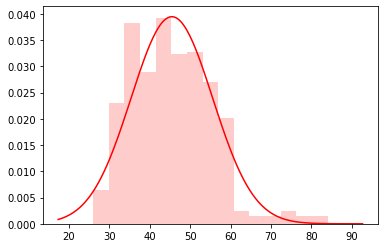

In [16]:
sns.distplot(divorced, hist_kws = {'color': 'r', "alpha": 0.2},
           fit = stats.norm, fit_kws = {'color': 'r'}, kde = False)

C:\Users\201710567\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

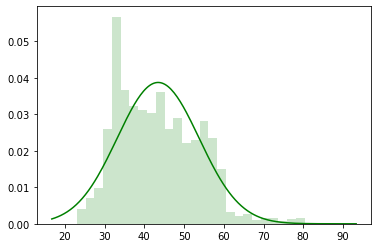

In [17]:
sns.distplot(married, hist_kws = {'color': 'g', "alpha": 0.2},
           fit = stats.norm, fit_kws = {'color': 'g'}, kde = False)

C:\Users\201710567\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

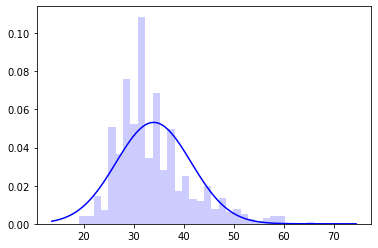

In [18]:
sns.distplot(single, hist_kws = {'color': 'b', "alpha": 0.2},
           fit = stats.norm, fit_kws = {'color': 'b'}, kde = False)

C:\Users\201710567\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\201710567\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\201710567\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

<AxesSubplot:>

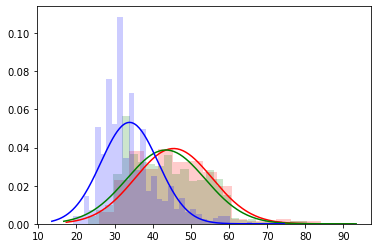

In [19]:
sns.distplot(divorced, hist_kws = {'color': 'r', "alpha": 0.2},
           fit = stats.norm, fit_kws = {'color': 'r'}, kde = False)
sns.distplot(married, hist_kws = {'color': 'g', "alpha": 0.2},
           fit = stats.norm, fit_kws = {'color': 'g'}, kde = False)
sns.distplot(single, hist_kws = {'color': 'b', "alpha": 0.2},
           fit = stats.norm, fit_kws = {'color': 'b'}, kde = False)